In [1]:
#EDA4
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [2]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Display basic dataset info
print("Dataset Overview:\n", df.info())
print("\nColumn Names:\n", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
Dataset Overview:
 None

Column Names:
 ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']

Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [3]:
duplicate_rows = df[df.duplicated()]

# Display duplicate rows if any exist
if not duplicate_rows.empty:
    print("\nDuplicate Rows Found:\n", duplicate_rows)
else:
    print("\nNo Duplicate Rows Found!")



Duplicate Rows Found:
               Artist                                         Track Name  \
39      Travis Scott                             MELTDOWN (feat. Drake)   
52      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
72         21 Savage                                            née-nah   
73             Drake                      Jimmy Cooks (feat. 21 Savage)   
76             Drake                                          Rich Flex   
131            Drake               First Person Shooter (feat. J. Cole)   
170     Metro Boomin            Trance (with Travis Scott & Young Thug)   
182   D-Block Europe                                           Overseas   
210      Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
212     Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
222          Cardi B                    WAP (feat. Megan Thee Stallion)   
224          Cardi B                 Bongos (feat. Megan Thee Stallion)   
2

In [6]:
df_cleaned = df.drop_duplicates()

removed_count = len(df) - len(df_cleaned)
print(f"Removed {removed_count} duplicate rows.")

# Save the cleaned dataset (optional)
df_cleaned.to_csv("spotify_cleaned.csv", index=False)


Removed 27 duplicate rows.


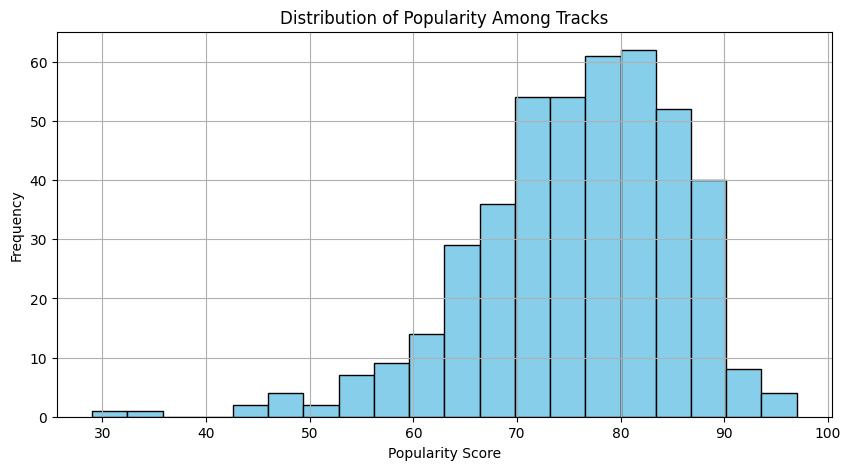

In [8]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
import matplotlib.pyplot as plt


# Convert 'Popularity' column to numeric
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df["Popularity"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Popularity Among Tracks")
plt.grid(True)
plt.show()


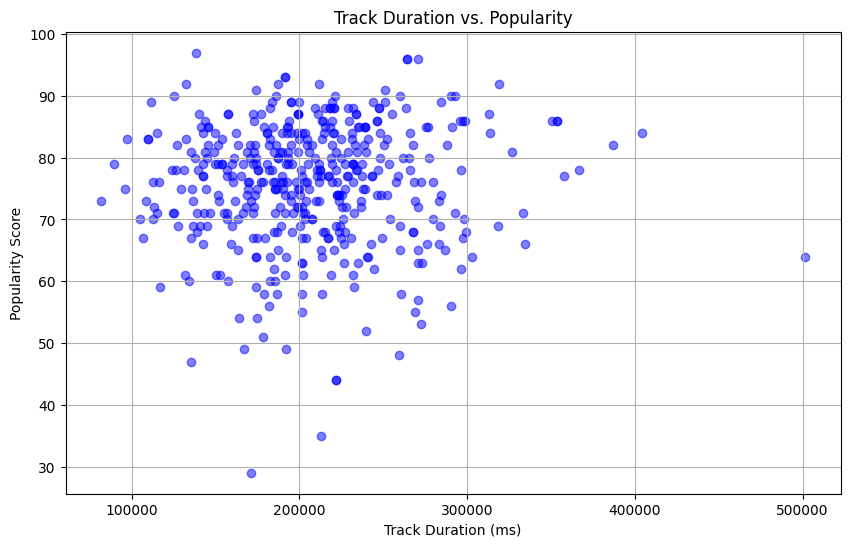

In [9]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")

# Scatter plot to explore correlation
plt.figure(figsize=(10, 6))
plt.scatter(df["Duration (ms)"], df["Popularity"], alpha=0.5, color="blue")
plt.xlabel("Track Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Track Duration vs. Popularity")
plt.grid(True)
plt.show()


<ipython-input-11-f79c73e4c875>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_track_count.index[:10], y=artist_track_count.values[:10], palette="coolwarm")


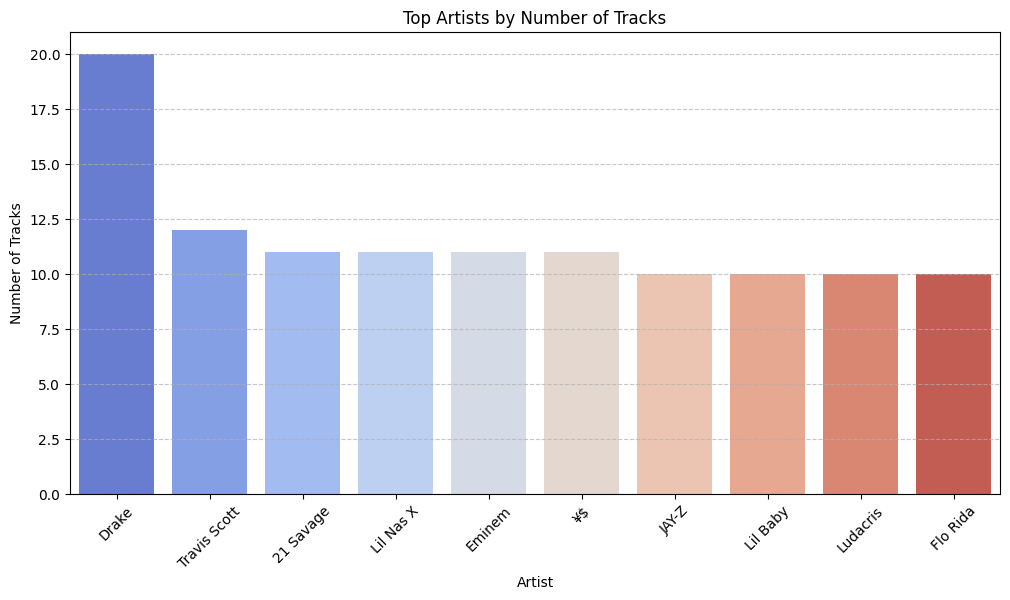

In [11]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot
import seaborn as sns
# Count the number of tracks for each artist
artist_track_count = df["Artist"].value_counts()

# Plot the track count per artist
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_track_count.index[:10], y=artist_track_count.values[:10], palette="coolwarm")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Top Artists by Number of Tracks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [12]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.


# Ensure the 'Popularity' column is numeric
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

# Find the least popular 5 tracks
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]

# Display the results
print(least_popular_tracks)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [13]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist.

# Convert 'Popularity' to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

# Compute the average popularity for each artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean()

# Get the top 5 most popular artists by average popularity
top_5_artists = artist_avg_popularity.nlargest(5)

# Display the results
print("Top 5 Artists by Average Popularity:\n", top_5_artists)

# Identify the artist with the highest average popularity
most_popular_artist = top_5_artists.idxmax()
highest_popularity = top_5_artists.max()

print(f"\nMost Popular Artist (Highest Average Popularity): {most_popular_artist} with an average popularity of {highest_popularity:.2f}")

Top 5 Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

Most Popular Artist (Highest Average Popularity): cassö with an average popularity of 92.00


In [16]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Compute the average popularity for each artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean()

# Get the top 5 most popular artists by average popularity
top_5_artists = artist_avg_popularity.nlargest(5).index

# Filter dataset for top 5 artists
top_tracks = df[df["Artist"].isin(top_5_artists)].sort_values(["Artist", "Popularity"], ascending=[True, False])

# Get the most popular track for each artist
most_popular_tracks = top_tracks.groupby("Artist").first()[["Track Name", "Popularity"]]

# Display results
print(most_popular_tracks)


                                Track Name  Popularity
Artist                                                
David Guetta            Baby Don't Hurt Me          87
Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno        Mamichula - con Nicki Nicole          89
cassö                                Prada          92
¥$                                CARNIVAL          96


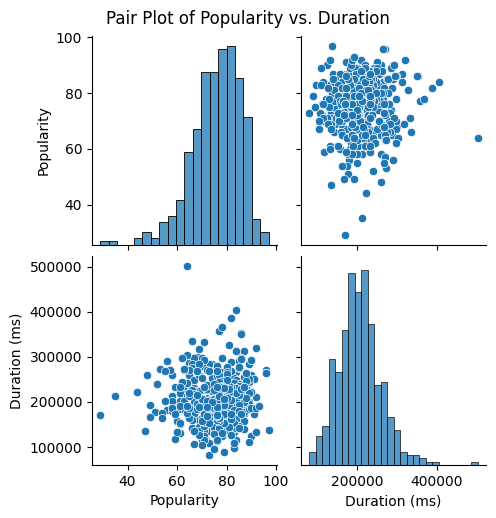

In [17]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.
# Convert relevant columns to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")

# Select numerical columns for pair plot
num_cols = ["Popularity", "Duration (ms)"]

# Create pair plot
sns.pairplot(df[num_cols])
plt.suptitle("Pair Plot of Popularity vs. Duration", y=1.02)
plt.show()

<ipython-input-18-6922a850542b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Artist", y="Duration (ms)", data=df_filtered, palette="coolwarm")


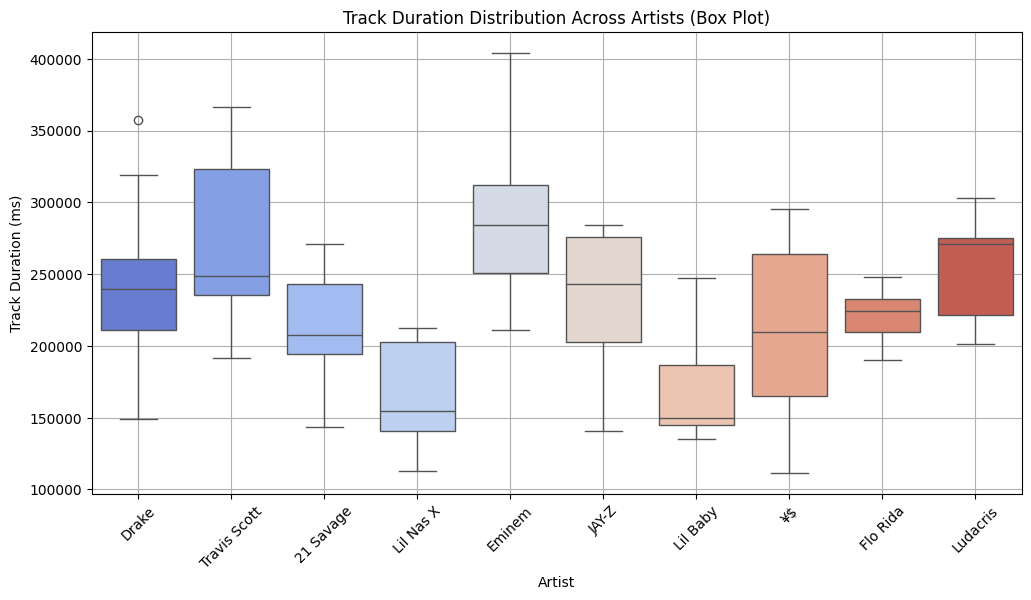

<ipython-input-18-6922a850542b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Artist", y="Duration (ms)", data=df_filtered, palette="coolwarm", inner="quartile")


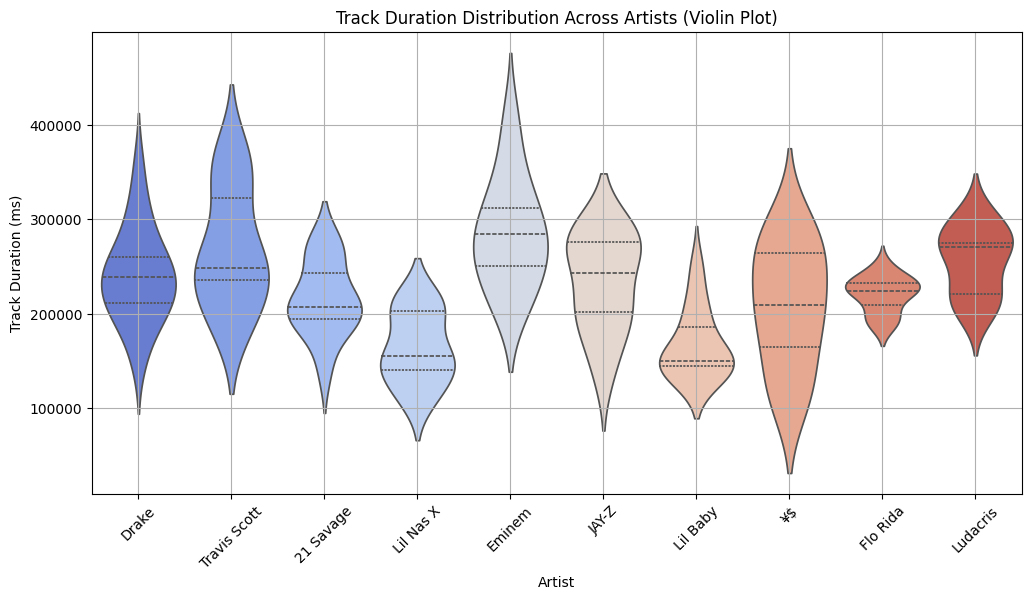

In [18]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot.
# Convert 'Duration (ms)' to numeric format
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")

# Select top 10 artists with the most tracks for better visualization
top_artists = df["Artist"].value_counts().index[:10]
df_filtered = df[df["Artist"].isin(top_artists)]

# Create a Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df_filtered, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Track Duration Distribution Across Artists (Box Plot)")
plt.grid(True)
plt.show()

# Create a Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Duration (ms)", data=df_filtered, palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Track Duration Distribution Across Artists (Violin Plot)")
plt.grid(True)
plt.show()

<ipython-input-19-af9b3c583832>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Artist", y="Popularity", data=df_filtered, palette="coolwarm", alpha=0.7)


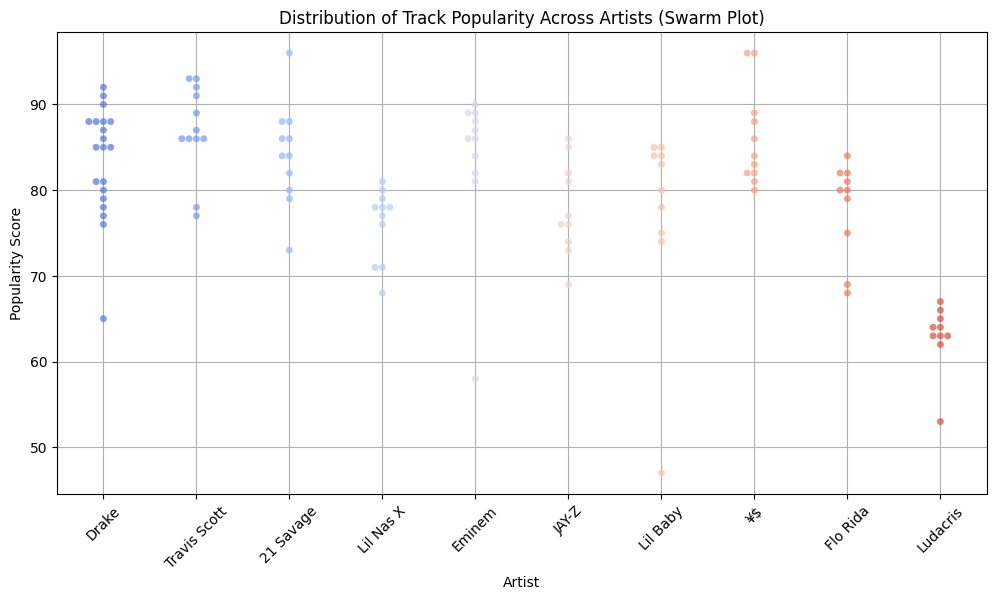

<ipython-input-19-af9b3c583832>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Artist", y="Popularity", data=df_filtered, palette="coolwarm", inner="quartile")


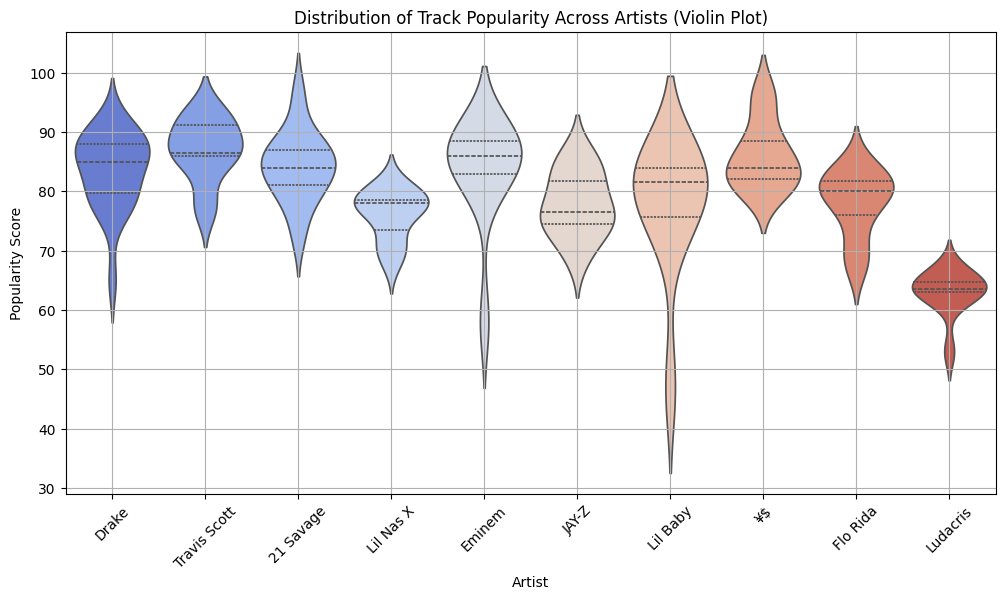

In [19]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.
# Select top 10 artists with the most tracks for better visualization
top_artists = df["Artist"].value_counts().index[:10]
df_filtered = df[df["Artist"].isin(top_artists)]

# Create a Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Artist", y="Popularity", data=df_filtered, palette="coolwarm", alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Distribution of Track Popularity Across Artists (Swarm Plot)")
plt.grid(True)
plt.show()

# Create a Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df_filtered, palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Distribution of Track Popularity Across Artists (Violin Plot)")
plt.grid(True)
plt.show()